# Dataset

In [30]:
# Menghubungkan Ke Google Drive Untuk Memanggil Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Arahkan Jalur Untuk Memanggil Dataset Dari Sumber Folder Utama
%cd /content/drive/MyDrive/Project Data Wrangling Visualization - Teach4Hope

/content/drive/MyDrive/Project Data Wrangling Visualization - Teach4Hope


In [32]:
# Melihat Isi Folder Apakah Dataset Telah Ada
!ls

country-and-continent-codes-list.csv  filtered_datateams.csv	   highest_earning_teams.csv
filtered_dataplayer.csv		      highest_earning_players.csv  Housing.csv


In [33]:
# Memanggil modul yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#ignore all warnings
warnings.filterwarnings('ignore')

### 1) Fungsi Yang Dibuat Untuk Cleaning pada dataset `highest_earning_players.csv`

In [70]:
def clean_data_players(df):
    # Mengecek duplikat
    print("Identifikasi Data Yang Duplikat :")
    print(df.duplicated().sum())

    # Mengecek missing value
    print("")
    print("Identifikasi missing value :")
    print(df.isna().sum())
    print("")

    # Menampilkan 10 data teratas
    print("Melihat 10 data teratas:\n", df.head(10))
    print("")

    # Mengecek informasi dataset
    print("Melihat Informasi pada dataset :")
    print(df.info())

    # Menampilkan statistik deskriptif
    print("")
    print("Statistik deskriptif:\n", df.describe())

    # Identifikasi Inkonsistensi kolom Game dan Genre
    print("")
    print("Identifikasi Inkonesistensi kolom Game dan Genre :")
    print(df["Game"].unique())
    print(df["Genre"].unique())
    print("")

    # Mengecek persebaran data
    print("Melihat persebaran data pada kolom TotalUSDPrize :")
    sns.boxplot(data=df, x='TotalUSDPrize')

    # Menyimpan dataset
    df.to_csv('filtered_dataplayer.csv', index=False)

### 2) Fungsi Yang Dibuat Untuk Cleaning pada dataset `highest_earning_teams.csv`

In [71]:
def clean_data_teams(df):
    # Mengecek duplikat
    print("Identifikasi Data Yang Duplikat :")
    print(df.duplicated().sum())

    # Mengecek missing value
    print("")
    print("Identifikasi missing value :")
    print(df.isna().sum())
    print("")

    # Menampilkan 10 data teratas
    print("Melihat 10 data teratas:\n", df.head(10))
    print("")

    # Mengecek informasi dataset
    print("Melihat Informasi pada dataset :")
    print(df.info())

    # Menampilkan statistik deskriptif
    print("")
    print("Statistik deskriptif:\n", df.describe())

    # Identifikasi Inkonsistensi kolom Game dan Genre
    print("")
    print("Identifikasi Inkonesistensi kolom Game dan Genre :")
    print(df["Game"].unique())
    print(df["Genre"].unique())
    print("")

    # Handling Outlier
    Q1 = df['TotalTournaments'].quantile(0.25)
    Q3 = df['TotalTournaments'].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Hapus outlier
    df_filtered = df[(df['TotalTournaments'] >= lower_bound) & (df['TotalTournaments'] <= upper_bound)]

    # Menampilkan boxplot setelah menghapus outlier
    sns.boxplot(data=df_filtered, x='TotalTournaments')

    # Menyimpan dataset
    df_filtered.to_csv('filtered_datateams.csv', index=False)

Identifikasi Data Yang Duplikat :
0

Identifikasi missing value :
PlayerId         0
NameFirst        0
NameLast         0
CurrentHandle    0
CountryCode      0
TotalUSDPrize    0
Game             0
Genre            0
dtype: int64

Melihat 10 data teratas:
    PlayerId NameFirst   NameLast CurrentHandle CountryCode  TotalUSDPrize  \
0      3883     Peter  Rasmussen       dupreeh          dk     1822989.41   
1      3679   Andreas   Højsleth         Xyp9x          dk     1799288.57   
2      3885   Nicolai     Reedtz        dev1ce          dk     1787489.88   
3      3672     Lukas  Rossander        gla1ve          dk     1652350.75   
4     17800      Emil       Reif        Magisk          dk     1416448.64   
5     16800     Jakey        Yip      Stewie2k          us     1087340.00   
6     12183  Epitácio    de Melo          TACO          br     1063858.27   
7     12169  Fernando  Alvarenga           fer          br     1063038.92   
8      2455   Gabriel     Toledo        FalleN   

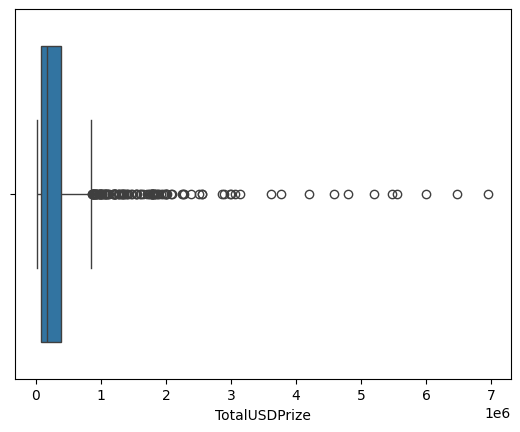

In [72]:
# Memanggil data
dfplayer = pd.read_csv('highest_earning_players.csv')
dfteams = pd.read_csv('highest_earning_teams.csv')

# Cleaning data untuk players
clean_data_players(dfplayer)

Identifikasi Data Yang Duplikat :
0

Identifikasi missing value :
TeamId              0
TeamName            0
TotalUSDPrize       0
TotalTournaments    0
Game                0
Genre               0
dtype: int64

Melihat 10 data teratas:
    TeamId                TeamName  TotalUSDPrize  TotalTournaments       Game  \
0     760     San Francisco Shock     3105000.00                 7  Overwatch   
1     776         London Spitfire     1591136.50                13  Overwatch   
2     768      New York Excelsior     1572618.50                18  Overwatch   
3     773     Philadelphia Fusion     1186278.50                15  Overwatch   
4     766           Seoul Dynasty     1130000.00                 6  Overwatch   
5     856        Vancouver Titans      950000.00                 4  Overwatch   
6     769        Shanghai Dragons      755000.00                 5  Overwatch   
7     774  Los Angeles Gladiators      709605.19                13  Overwatch   
8     861           Atlanta Reign

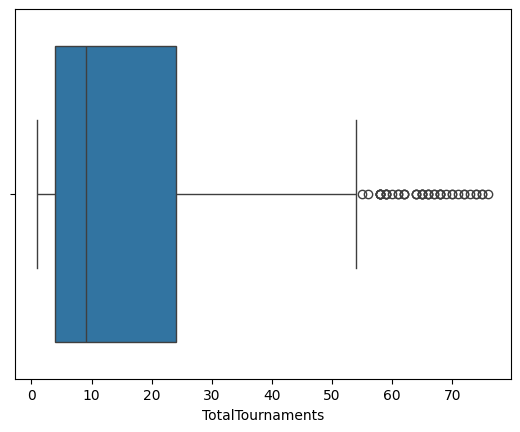

In [73]:
# Cleaning data untuk teams dan handling outlier
clean_data_teams(dfteams)